<a href="https://colab.research.google.com/github/parulsinghr/hotel-booking-analysis/blob/main/Hotel_booking_analysis_team_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

Explore and analyze the data to discover important factors that govern the bookings.

# Importing Libraries and datasets

In [ ]:
# Lets dive in
# lets import packages and data required for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path="/content/drive/MyDrive/Almabetter/Hotel_bookings/Hotel Bookings.csv"

In [ ]:
df=pd.read_csv(file_path)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


# Checking for null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# checking for null values 

null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Cleaning data

- Dropping unnecessary data for analysis
- Replacing null data with appropriate values

In [ ]:
#Dropping company coloumn from main dataset because it has 94% missing values
company_df = df.drop(['company'], axis = 1,inplace=True)

In [ ]:
agent_df=df.drop(['agent'], axis = 1,inplace=True)

In [ ]:
# checking correlation
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,-0.010621,0.029186,0.037383,0.097889


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# looking for total null in columns
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

## imputing missing data

In [ ]:
# def a function to input data in to missing places
def median_input(data_column):
  return data_column.fillna(data_column.median())

In [ ]:
df.children = df['children'].transform(median_input)

In [ ]:
df['country'].fillna(str(df['country'].mode().values[0]),inplace=True)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Univarite analysis

### 1. What is most preffered hotel by customers

In [ ]:
type_hotels = df['hotel'].value_counts()
type_hotels

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Text(0, 0.5, 'Count')

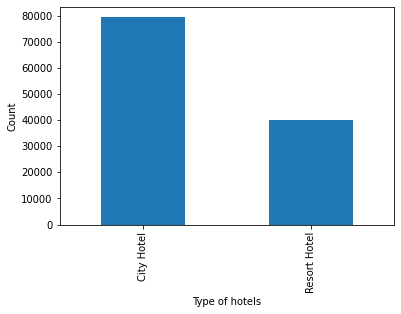

In [ ]:
type_hotels.plot(kind = 'bar')
plt.xlabel('Type of hotels')
plt.ylabel('Count')

## 2.Cancellations according to hotel

In [ ]:
cancel_count = df.groupby(['hotel'])['is_canceled'].value_counts()
cancel_count

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: is_canceled, dtype: int64

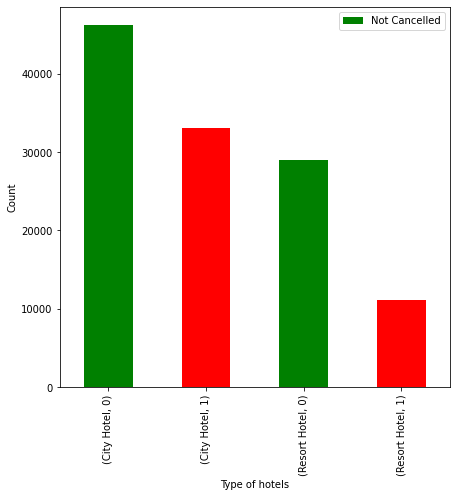

In [ ]:
plt.rcParams['figure.figsize'] = (7, 7)
cancel_count.plot(kind = 'bar',color=['green','red'])
plt.xlabel('Type of hotels')
plt.ylabel('Count')
plt.legend(labels=['Not Cancelled','Canceled'])

## 3. Meal prefered by hotelers

In [ ]:
meal_type = df['meal'].value_counts()
meal_type

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

Text(0, 0.5, 'Count')

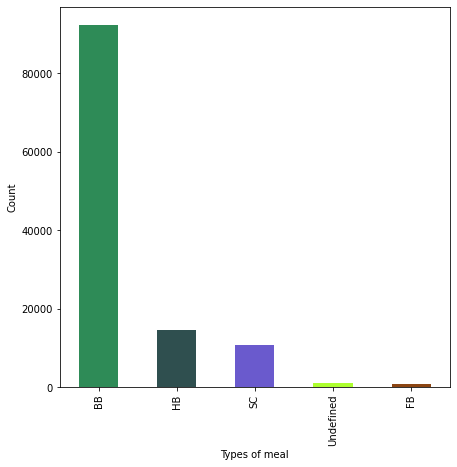

In [ ]:
plt.rcParams['figure.figsize'] = (7, 7)
meal_type.plot(kind = 'bar',color=['seagreen','darkslategrey','slateblue','greenyellow','saddlebrown'])
plt.xlabel('Types of meal')
plt.ylabel('Count')

## 4.User by market

In [ ]:
user_market = df['market_segment'].value_counts()
label_data = df['market_segment'].value_counts().index.tolist()
user_market

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

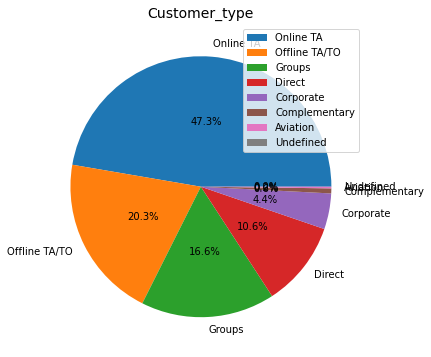

In [ ]:
pie, ax = plt.subplots(figsize=[9,6])
plt.pie(user_market, autopct="%.1f%%", labels=label_data, pctdistance=0.5)
plt.title("Customer_type", fontsize=14);
plt.legend(labels=label_data,loc='upper right')

## 5.Customer type

In [ ]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

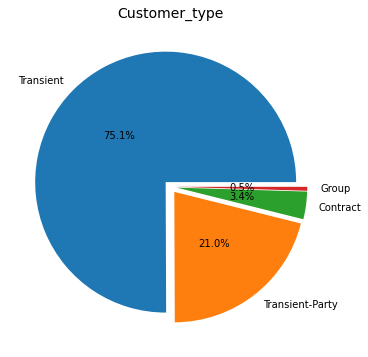

In [ ]:
# sns.countplot(x='customer_type',data=df,hue= 'customer_type')
customer_count = df['customer_type'].value_counts()
customer_labels = df['customer_type'].value_counts().index.tolist()
#Using matplotlib
pie, ax = plt.subplots(figsize=[6,6])
plt.pie(customer_count, autopct="%.1f%%", explode=[0.05]*4, labels=customer_labels, pctdistance=0.5)
plt.title("Customer_type", fontsize=14);

## 6. country wise

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


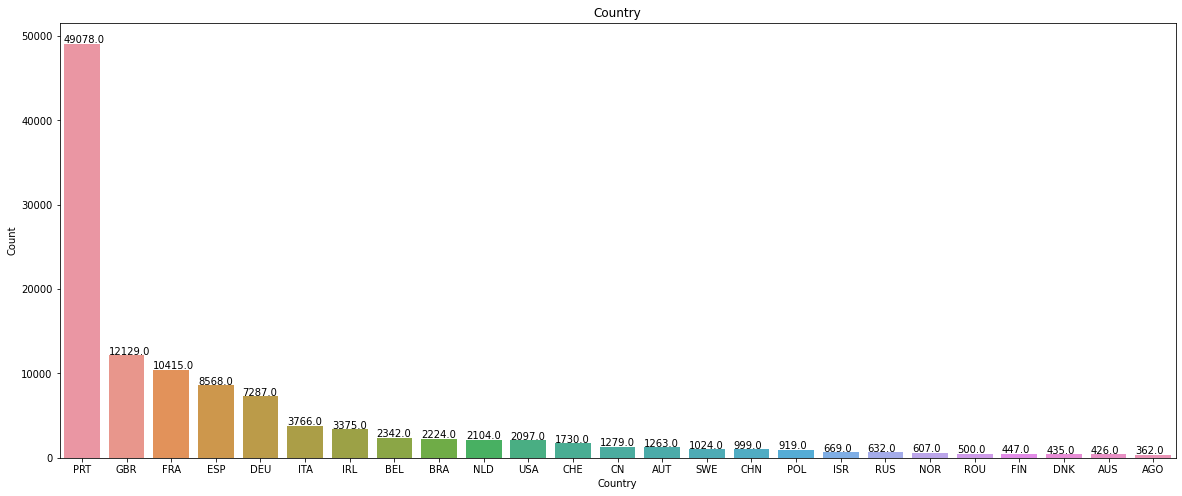

In [ ]:
plt.figure(figsize=(20,8))
df_country = df['country'].value_counts().nlargest(25).astype(int)
ax = sns.barplot(df_country.index, df_country.values)
plt.title('Country')
plt.xlabel('Country')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x(), p.get_height()+100)) 

# 7.Nights stayed

Text(0, 0.5, 'Number of Stays')

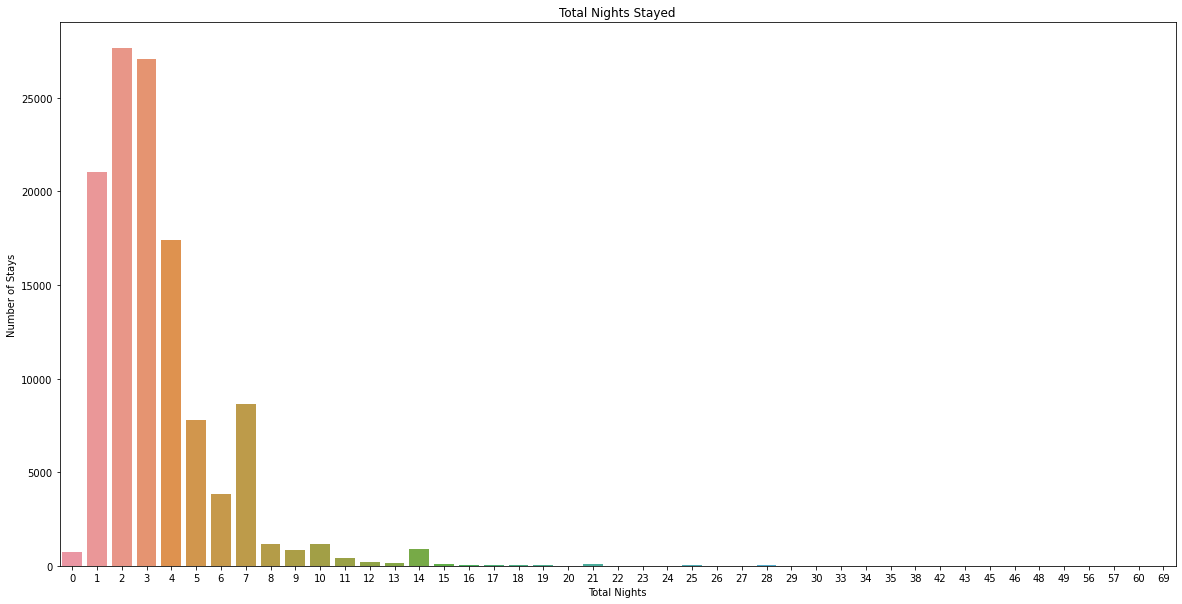

In [ ]:
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
plt.figure(figsize=(20,10))
sns.countplot(x= "total_nights", data = df)
plt.title('Total Nights Stayed')
plt.xlabel('Total Nights')
plt.ylabel('Number of Stays')

## Deposit type

In [ ]:
deposit_type1 = df['deposit_type'].value_counts()
deposit_type1

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

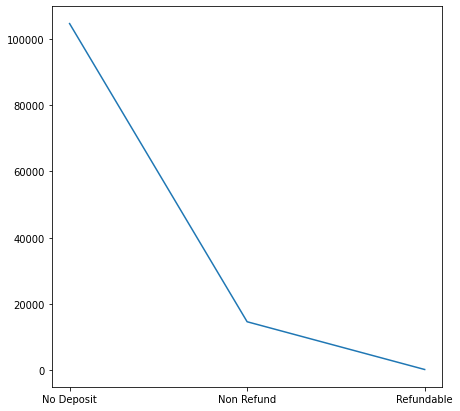

In [ ]:
plt.plot(deposit_type1)

# Bivariate
### 1. Lets find out which month has more booking in different hotel types

In [ ]:
month_wise=df.groupby(['arrival_date_month','hotel'])['arrival_date_month'].count().unstack()

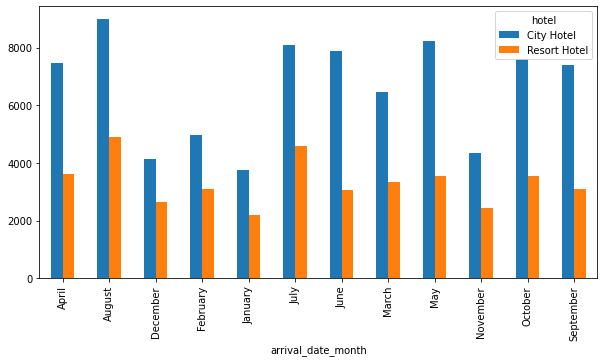

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
month_wise.plot(kind='bar')

In [ ]:
month_year_wise=df.sort_values(['arrival_date_year']).groupby(['arrival_date_year','arrival_date_month','hotel'],sort=False )['arrival_date_year'].count().unstack()
month_year_wise

hotel                                 Resort Hotel  City Hotel
arrival_date_year arrival_date_month                          
2015              July                        1378        1398
                  December                    1266        1654
                  August                      1409        2480
                  November                    1105        1235
                  September                   1585        3529
                  October                     1571        3386
2016              July                        1441        3131
                  December                    1382        2478
                  August                      1685        3378
                  November                    1332        3122
                  September                   1523        3871
                  October                     1984        4219
                  June                        1369        3923
                  January                      884        1364
                  April                       1867        3561
                  March                       1778        3046
                  February                    1520        2371
                  May                         1802        3676
2017              July                        1754        3559
                  August                      1800        3125
                  June                        1676        3971
                  January                     1309        2372
                  April                       1742        3919
                  March                       1558        3412
                  February                    1583        2594
                  May                         1757        4556

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


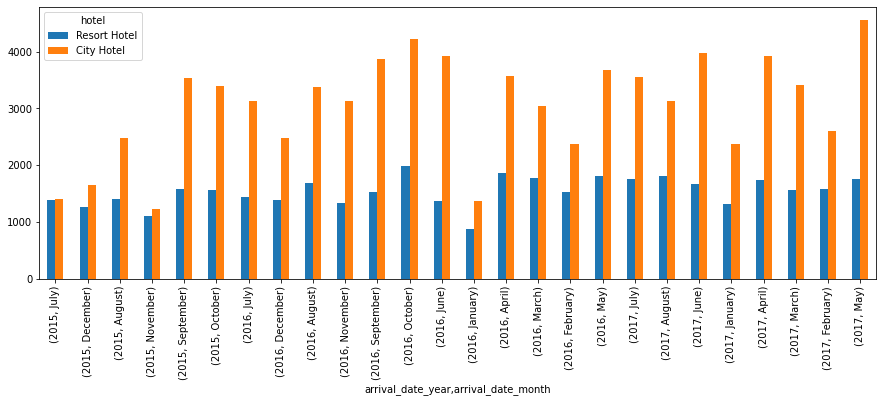

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
month_year_wise.plot(kind='bar')

- In year 2015, september and october have more bookings
- In year 2016, september has more bookings
- In year 2017, May has more number of bookings

# **Most busy months**

In [ ]:
#make 2 seperate dasets for resort hotel and city hotel
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

#first find resort hotel guest
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests

,month,no of guests
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [ ]:
#now find out city hotel guest
city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
city_guests

,month,no of guests
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [ ]:
#we merge both resort and city hotel 
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']
final_guests

,month,no of guests in resort,no of guest in city hotel
0,August,3257,5381
1,July,3137,4782
2,October,2577,4337
3,March,2573,4072
4,April,2550,4015
5,May,2535,4579
6,February,2308,3064
7,September,2102,4290
8,June,2038,4366
9,December,2017,2392


Above analysis show, May-August are the busiest, but here some unbalanced data left

In [ ]:
# cleaning data for excess july and august month that skewing result
data_resort1 = data_resort.copy()
data_resort1.drop(data_resort1[(data_resort1['arrival_date_year']==2015)&(data_resort1['arrival_date_month']=='July')].index,inplace=True)
data_resort1.drop(data_resort1[(data_resort1['arrival_date_year']==2015)&(data_resort1['arrival_date_month']=='August')].index,inplace=True)

In [ ]:
data_city1 = data_city.copy()
data_city1.drop(data_city1[(data_city1['arrival_date_year']==2015)&(data_city1['arrival_date_month']=='July')].index,inplace=True)
data_city1.drop(data_city1[(data_city1['arrival_date_year']==2015)&(data_city1['arrival_date_month']=='August')].index,inplace=True)

In [ ]:
data_city1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
42138,City Hotel,0,1,2015,September,36,1,0,1,1,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,0,Contract,95.00,0,1,Check-Out,2015-09-02,1
42139,City Hotel,0,8,2015,September,36,1,0,2,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient,73.15,0,0,Check-Out,2015-09-03,2
42140,City Hotel,0,0,2015,September,36,1,0,1,2,0.0,0,BB,PRT,Complementary,Direct,0,0,0,A,E,0,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-09-02,1
42141,City Hotel,0,1,2015,September,36,1,0,1,1,0.0,0,BB,PRT,Complementary,Direct,0,0,0,A,F,0,No Deposit,0,Transient,0.00,0,1,Check-Out,2015-09-02,1
42142,City Hotel,0,1,2015,September,36,1,0,1,1,0.0,0,BB,PRT,Complementary,Direct,0,0,0,A,A,0,No Deposit,0,Transient,0.00,0,1,Check-Out,2015-09-02,1


In [ ]:
#first find resort hotel guest
resort_guests1 = data_resort1['arrival_date_month'].value_counts().reset_index()
resort_guests1.columns=['month','no of guests']
resort_guests1

,month,no of guests
0,October,2577
1,March,2573
2,April,2550
3,May,2535
4,February,2308
5,August,2214
6,September,2102
7,July,2079
8,June,2038
9,December,2017


In [ ]:
#now find out city hotel guest
city_guests1 = data_city1['arrival_date_month'].value_counts().reset_index()
city_guests1.columns=['month','no of guests']
city_guests1

,month,no of guests
0,May,4579
1,June,4366
2,October,4337
3,July,4323
4,September,4290
5,August,4133
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [ ]:
#we merge both resort and city hotel 
final_guests1 = resort_guests1.merge(city_guests1,on='month')
final_guests1.columns=['month','guests in resort','guest in city hotel']
final_guests1

,month,guests in resort,guest in city hotel
0,October,2577,4337
1,March,2573,4072
2,April,2550,4015
3,May,2535,4579
4,February,2308,3064
5,August,2214,4133
6,September,2102,4290
7,July,2079,4323
8,June,2038,4366
9,December,2017,2392


In [ ]:
!pip install sort_dataframeby_monthorweek
!pip install sorted-months-weekdays

  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3441 sha256=3bd8eaec19007e821c8b175b6d8641cd2332b7a5919d20674f283754c182a38a
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=9af452a95bb783f83ceeeca7633eaa239d32129eb3e0e98e6ba3de94c58ccc05
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [ ]:
import sort_dataframeby_monthorweek
df_sort = sort_dataframeby_monthorweek.Sort_Dataframeby_Month(df=final_guests1,monthcolumnname='month')
df_sort

,month,guests in resort,guest in city hotel
0,January,1868,2254
1,February,2308,3064
2,March,2573,4072
3,April,2550,4015
4,May,2535,4579
5,June,2038,4366
6,July,2079,4323
7,August,2214,4133
8,September,2102,4290
9,October,2577,4337


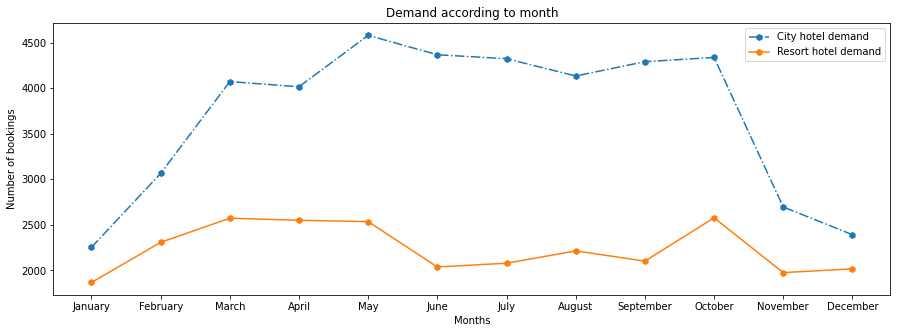

In [ ]:
plt.plot(df_sort['month'], df_sort['guest in city hotel'],'-.h')
plt.plot(df_sort['month'], df_sort['guests in resort'],'-h')
plt.title('Demand according to month')
plt.xlabel('Months')
plt.ylabel('Number of bookings')
plt.legend(labels=['City hotel demand','Resort hotel demand'])

In [ ]:
resort_month_df = data_resort1.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_month_df.head(15)

,arrival_date_month,adr
0,April,75.867816
1,August,194.381323
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,162.794949
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [ ]:
city_month_df = data_city1.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_month_df.head(15)
#we merge both resort and city hotel monthly data average
final_month_adr = resort_month_df.merge(city_month_df,on='arrival_date_month')
final_month_adr.columns=['month','Month avg resort','Month avg city']
final_month_adr

,month,Month avg resort,Month avg city
0,April,75.867816,111.856824
1,August,194.381323,129.485550
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,162.794949,120.020275
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


In [ ]:
import sort_dataframeby_monthorweek
df_sort_month = sort_dataframeby_monthorweek.Sort_Dataframeby_Month(df=final_month_adr,monthcolumnname='month')
df_sort_month

,month,Month avg resort,Month avg city
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,162.794949,120.020275
7,August,194.381323,129.485550
8,September,96.416860,112.598452
9,October,61.727505,101.745956


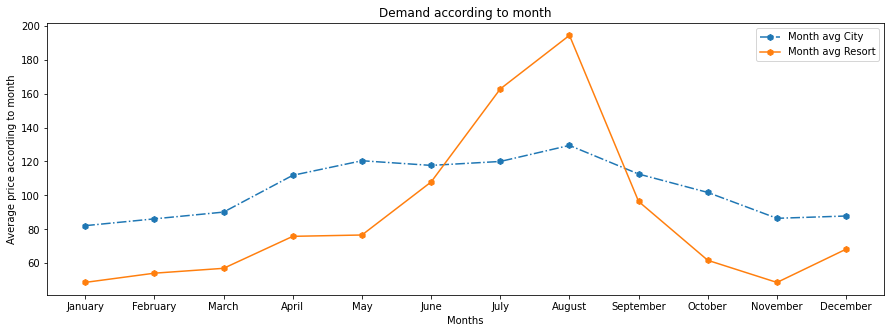

In [ ]:
plt.plot(df_sort_month['month'], df_sort_month['Month avg city'],'-.h')
plt.plot(df_sort_month['month'], df_sort_month['Month avg resort'],'-h')
plt.title('Demand according to month')
plt.xlabel('Months')
plt.ylabel('Average price according to month')
plt.legend(labels=['Month avg City ','Month avg Resort'])

## The optimal length of stay in order to get the best daily rate?

In [ ]:
resort_data = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
city_data = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [ ]:
resort_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_nights'],
      dtype='object')

Text(0, 0.5, 'Number of Stays')

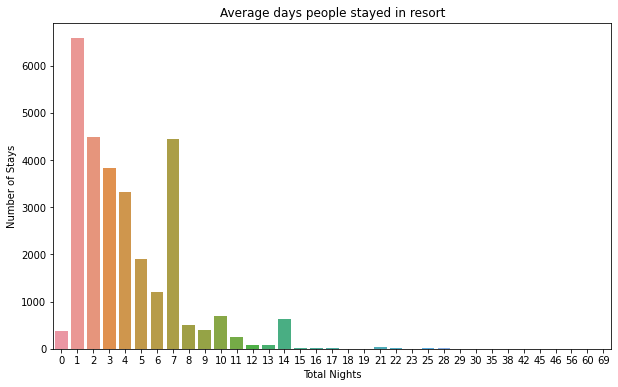

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x= "total_nights", data = resort_data)
plt.title('Average days people stayed in resort')
plt.xlabel('Total Nights')
plt.ylabel('Number of Stays')

People who choose resort more likely to book for 1 day

Text(0, 0.5, 'Number of Stays in City hotels')

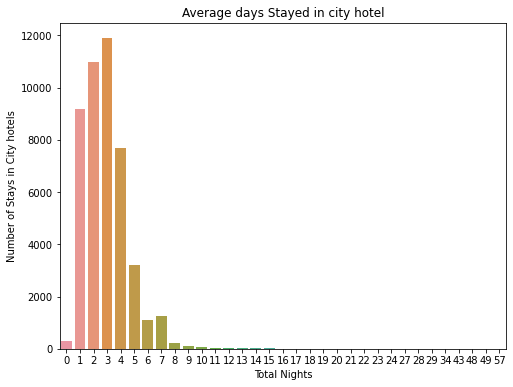

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x= "total_nights", data = city_data)
plt.title('Average days Stayed in city hotel')
plt.xlabel('Total Nights')
plt.ylabel('Number of Stays in City hotels')

In [ ]:
resort_hotel_df = resort_data.groupby(['total_nights'])['adr'].mean().reset_index()
resort_hotel_df.head(15)

,total_nights,adr
0,0,0.000000
1,1,73.754360
2,2,89.296123
3,3,94.077298
4,4,95.640659
5,5,110.157963
6,6,120.512446
7,7,97.378985
8,8,106.787045
9,9,109.594828


In [ ]:
city_hotel_df = city_data.groupby(['total_nights'])['adr'].mean().reset_index()
city_hotel_df.head(15)

,total_nights,adr
0,0,0.000000
1,1,105.347023
2,2,105.788464
3,3,107.524713
4,4,106.480432
5,5,106.907448
6,6,108.927697
7,7,108.275580
8,8,106.121435
9,9,112.851250


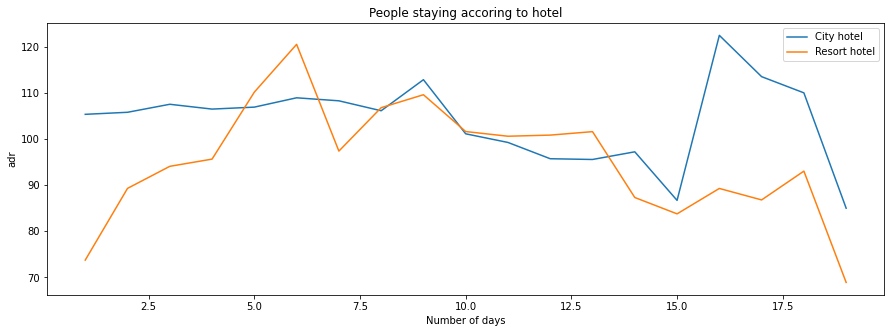

In [ ]:
plt.plot(city_hotel_df['total_nights'][1:20],city_hotel_df['adr'][1:20])
plt.plot(resort_hotel_df['total_nights'][1:20],resort_hotel_df['adr'][1:20])
plt.title('People staying accoring to hotel')
plt.xlabel('Number of days')
plt.ylabel('adr')
plt.legend(labels=['City hotel','Resort hotel'])

### Hotel preference by customer type

In [ ]:
customer_wise=df.groupby(['customer_type','hotel'])['customer_type'].count().unstack()
customer_wise

hotel,City Hotel,Resort Hotel
customer_type,,
Contract,2300,1776
Group,293,284
Transient,59404,30209
Transient-Party,17333,7791


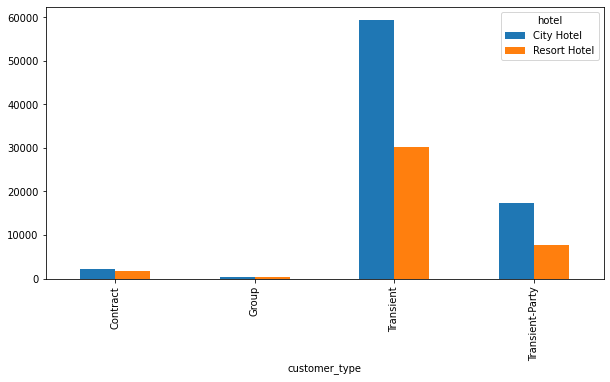

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
customer_wise.plot(kind='bar')

In [ ]:
adults_pre = df.groupby(['hotel'])['adults'].count()
adults_pre

hotel
City Hotel      79330
Resort Hotel    40060
Name: adults, dtype: int64

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [ ]:
list(df['reservation_status'].unique())

['Check-Out', 'Canceled', 'No-Show']

In [ ]:
reserv_stat = df[df['reservation_status'] == 'Check-Out']

## Have you ever wondered when the best time of year to book a hotel room is?

lets find out

In [ ]:
city_guests_average = data_city1.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_guests_average.columns = ['month','city_hotel_adr']
city_guests_average

,month,city_hotel_adr
0,April,111.856824
1,August,129.485550
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,120.020275
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [ ]:
resort_guests_average = data_resort1.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_guests_average.columns=['month','average_resort_adr']
resort_guests_average

,month,average_resort_adr
0,April,75.867816
1,August,194.381323
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,162.794949
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [ ]:
best_month = resort_guests_average.merge(city_guests_average)
best_month

,month,average_resort_adr,city_hotel_adr
0,April,75.867816,111.856824
1,August,194.381323,129.485550
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,162.794949,120.020275
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


In [ ]:
import sort_dataframeby_monthorweek # this is a pip package which helps to sort month data accordingly
best_month_book = sort_dataframeby_monthorweek.Sort_Dataframeby_Month(df=best_month,monthcolumnname='month')
best_month_book

,month,average_resort_adr,city_hotel_adr
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,162.794949,120.020275
7,August,194.381323,129.485550
8,September,96.416860,112.598452
9,October,61.727505,101.745956


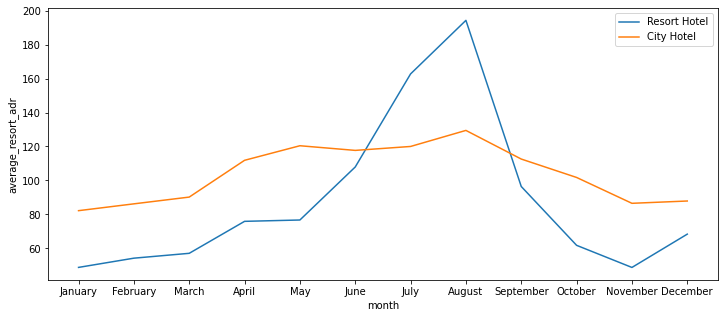

In [ ]:
plt.rcParams['figure.figsize'] = (12, 5)
sns.lineplot(data=best_month_book, x="month", y='average_resort_adr')
sns.lineplot(data=best_month_book, x="month", y='city_hotel_adr')
plt.legend(labels=['Resort Hotel','City Hotel'])

## Which people are more likely to cancel bookings

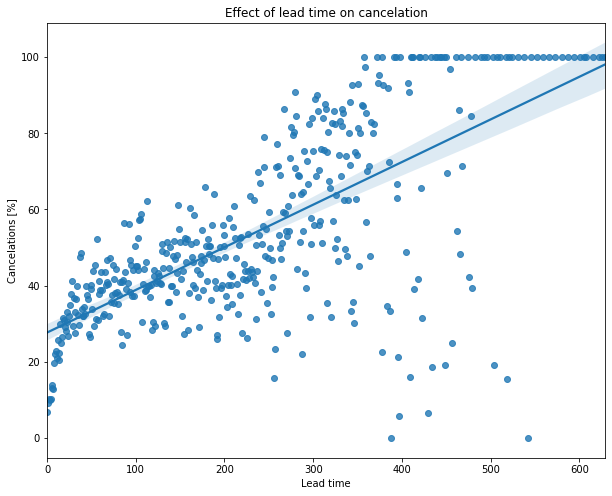

In [ ]:
# grouping data on lead_time:
lead_cancel_data = df.groupby("lead_time")["is_canceled"].describe()
# we use only lead_times with more than 10 bookings for graph:
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

#show figure:
plt.figure(figsize=(10, 8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation")
plt.xlabel("Lead time")
plt.ylabel("Cancelations [%]")
# plt.xlim(0,365)
plt.show()

## What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

In [ ]:
df['total_children'] = df['children']+df['babies']
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_nights,total_children
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005036,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,0.054186,0.047557,-0.195498,-0.234658,0.017779,-0.002808
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,-0.124410,0.086042,-0.073548,0.000149,0.170084,-0.063077,-0.116451,-0.095712,0.157167,-0.041276
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.010341,-0.119822,0.029218,0.030872,-0.056497,0.197580,-0.013684,0.108531,0.031438,0.049666
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,-0.030131,0.035501,-0.020904,0.005508,0.022933,0.075791,0.001920,0.026149,0.018719,0.007783
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.022728,0.030245,0.008683,0.003062,-0.027408,0.014004
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,-0.087239,-0.012775,-0.042715,0.063281,-0.054151,0.049342,-0.018554,0.072671,0.762790,0.048604
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,-0.002020,0.065237,-0.024859,0.068192,0.941005,0.047471
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.008283,0.230641,0.014785,0.122884,0.105249,0.033693
children,0.005036,-0.037613,0.054636,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,-0.032858,-0.024729,-0.021072,0.048952,-0.033271,0.324853,0.056255,0.081736,0.050865,0.971727
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,-0.010621,0.029186,0.037383,0.097889,0.022283,0.259389


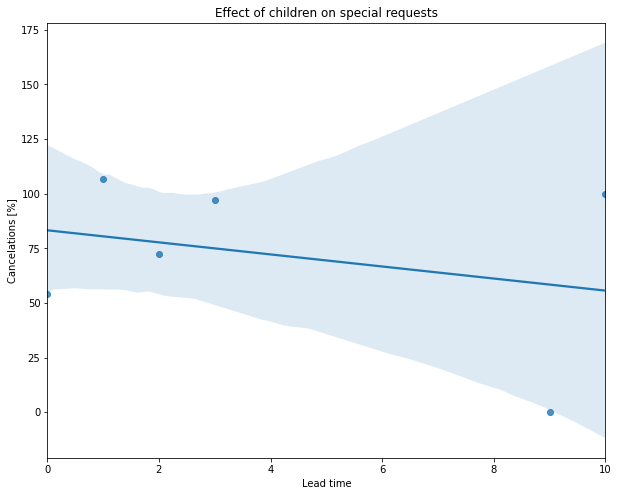

In [ ]:
# grouping data on lead_time:
lead_cancel_data = df.groupby("total_children")["total_of_special_requests"].describe()
# we use only lead_times with more than 10 bookings for graph:
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"]>=1]

#show figure:
plt.figure(figsize=(10, 8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of children on special requests")
plt.xlabel("Lead time")
plt.ylabel("Cancelations [%]")
# plt.xlim(0,365)
plt.show()

In [ ]:
month_year_wise=df.sort_values(['arrival_date_year']).groupby(['arrival_date_year','arrival_date_month','hotel','total_of_special_requests'],sort=False )['total_of_special_requests'].count().unstack().reset_index()
month_year_wise

total_of_special_requests,arrival_date_year,arrival_date_month,hotel,0,2,1,3,4,5
0,2015,July,Resort Hotel,647.0,207.0,476.0,46.0,1.0,1.0
1,2015,July,City Hotel,1257.0,42.0,96.0,3.0,NaN,NaN
2,2015,December,Resort Hotel,750.0,148.0,353.0,14.0,1.0,NaN
3,2015,December,City Hotel,1142.0,133.0,353.0,26.0,NaN,NaN
4,2015,August,Resort Hotel,553.0,277.0,493.0,76.0,10.0,NaN
5,2015,August,City Hotel,1906.0,214.0,319.0,38.0,3.0,NaN
6,2015,November,Resort Hotel,755.0,88.0,249.0,12.0,1.0,NaN
7,2015,November,City Hotel,870.0,92.0,259.0,14.0,NaN,NaN
8,2015,September,Resort Hotel,1010.0,181.0,367.0,25.0,2.0,NaN
9,2015,September,City Hotel,2816.0,256.0,414.0,41.0,2.0,NaN


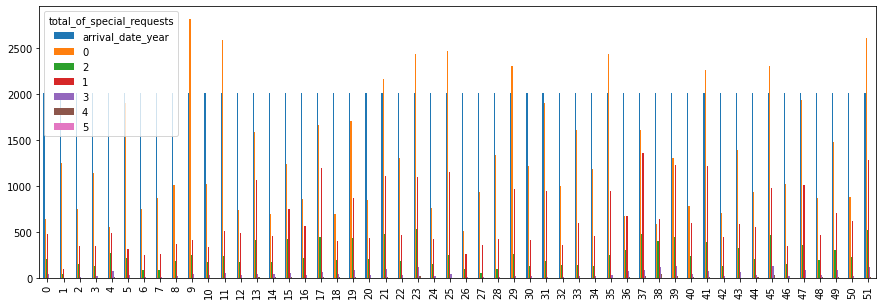

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
month_year_wise.plot(kind='bar')

In [ ]:
month_year_wise.index

RangeIndex(start=0, stop=52, step=1)

In [ ]:
nnn=df.groupby(['arrival_date_month','total_children'])['total_of_special_requests'].sum().reset_index()

In [ ]:
new_df = df.copy() # creating a dataframe copy

In [ ]:
new_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_nights',
       'total_children'],
      dtype='object')

In [ ]:
new_df=new_df.drop(index=0,columns='total_of_special_requests')

In [ ]:
month_special_reqs=df.groupby(['arrival_date_month'])['total_of_special_requests'].sum().reset_index()

Text(0, 0.5, 'Special request count')

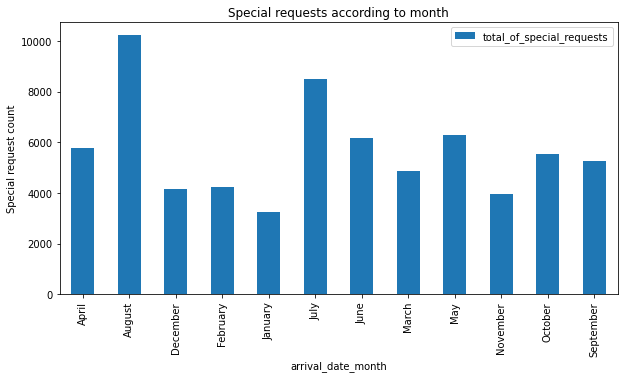

In [ ]:
month_special_reqs.plot(kind='bar',x='arrival_date_month',y='total_of_special_requests')
plt.title('Special requests according to month')
plt.ylabel('Special request count')

Text(0, 0.5, 'Special request count')

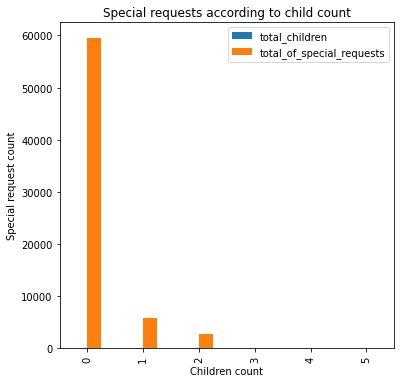

In [ ]:
child_special_reqs=df.groupby(['total_children'])['total_of_special_requests'].sum().reset_index()
plt.rcParams['figure.figsize'] = (6, 6)
child_special_reqs.plot(kind='bar')
plt.title('Special requests according to child count')
plt.xlabel('Children count')
plt.ylabel('Special request count')

Text(0, 0.5, 'Special request count')

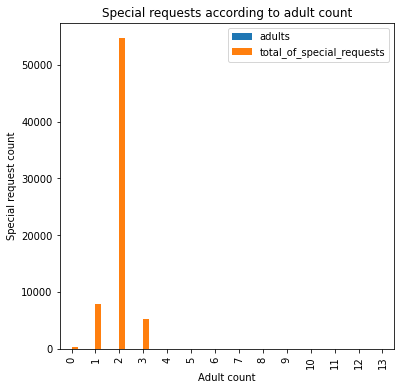

In [ ]:
adult_special_reqs=df.groupby(['adults'])['total_of_special_requests'].sum().reset_index()
plt.rcParams['figure.figsize'] = (6, 6)
adult_special_reqs.plot(kind='bar')
plt.title('Special requests according to adult count')
plt.xlabel('Adult count')
plt.ylabel('Special request count')

In [ ]:
adult_req_months=df.groupby(['arrival_date_month'])['total_of_special_requests','adults'].sum().reset_index()
adult_req_months

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,arrival_date_month,total_of_special_requests,adults
0,April,5783,20806
1,August,10223,27795
2,December,4163,12382
3,February,4241,14450
4,January,3246,10024
5,July,8505,25164
6,June,6169,20353
7,March,4872,17675
8,May,6280,21539
9,November,3949,11488


Text(0, 0.5, 'demand with adults & special requests')

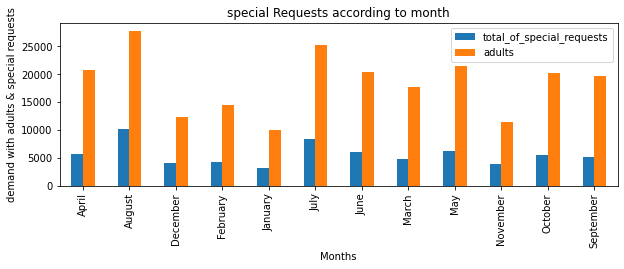

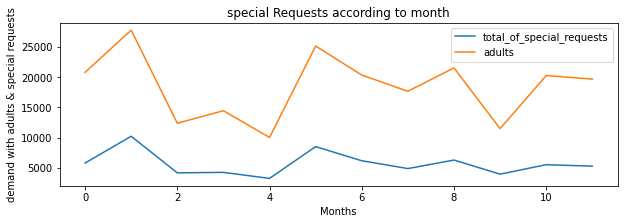

In [ ]:
plt.rcParams['figure.figsize']=(10,3)
adult_req_months.plot(x='arrival_date_month',kind='bar')
plt.title('special Requests according to month')
plt.xlabel('Months')
plt.ylabel('demand with adults & special requests')
adult_req_months.plot()
plt.title('special Requests according to month')
plt.xlabel('Months')
plt.ylabel('demand with adults & special requests')

# Conclusions

1. At a peak, more number of bookings in the month May. But when we go through the day, The more demand for hotels is in between Mar-May & Sep-Oct.
2. Prices are high in the month of August. People can get best price in between Nov-Mar.
3. When people book hotel just before their arrival, they are unlikely to cancel.
4. More number of special requests happen in the month of August and most when 2 adults book the hotel.
